# Repeated Measures ANOVAs

In [1]:
#### Page 1

## Introduction

Repeated Measures ANOVAs, also known as within subjects ANOVAs, are when you are measuring the same person or thing repeatedly over time. Although they are used extensively in research studies and experiments, they often have in real-world data science applications when looking at changes over time. For instance, did unemployment rate increase from 2008 to 2009?

In [2]:
#### Page 2

## Repeated Measures ANOVAs Setup in R

Now that you have a basic understanding of what repeated measures ANOVAs are, you will jump right in!

## Load Libraries

Repeated measures ANOVAs come as part of the base package in R, so the only libraries you will need to load in are rcompanion because you'll use it to check for the assumption of normality, car if you need to run an ANOVA that will correct for a violation of homogeneity of variance, and fastR, which is used for some data wrangling to get your data in the right shape for repeated measures ANOVAs.

In [3]:
## packages
library(tidyverse)
library(rcompanion)
library(car)
## could not get fastR installed

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




## Load in Data

You will be examining data from a study about the effect of eating breakfast on weight loss and associated metrics, such as resting metabolic rate and waist circumference. Most metrics were measured at baseline, and then again at follow-up, which was six weeks later.

In [4]:
data = read.csv('../../datasets/breakfast.csv')

In [5]:
head(data)

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,Baseline.Body.Mass..kg.,Follow.Up.Body.Mass..kg.,Baseline.Lean.Tissue.Mass..kg.,Follow.Up.Lean.Tissue.Mass..kg.,Baseline.Adipose.Tissue.Mass..kg.,...,Week.1.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.6.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.1.CV.Afternoon.Evening.Interstitial.Glucose....,Week.6.CV.Afternoon.Evening.Interstitial.Glucose....,Week.1.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.CV.Sleeping.Interstitial.Glucose....,Week.6.CV.Sleeping.Interstitial.Glucose....
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,Fasting,27,Female,1.75,71.5,71.1,51.8,52.4,15.1,...,5.5,5.2,13.8,14.7,6.5,7.8,5.2,5.6,9.0,15.7
2,4,Fasting,25,Female,1.72,74.6,73.8,50.4,51.7,21.0,...,5.7,5.8,9.0,11.0,6.3,6.8,5.6,5.6,6.9,9.1
3,11,Fasting,44,Male,1.64,68.0,68.1,46.7,47.0,17.9,...,5.7,5.4,17.4,12.6,7.1,7.5,5.6,5.5,11.6,13.1
4,14,Fasting,36,Female,1.68,57.0,57.3,41.0,41.9,13.6,...,5.2,5.2,16.7,16.4,7.3,7.7,5.2,5.5,11.0,10.1
5,16,Fasting,28,Female,1.64,49.4,49.0,36.4,35.9,10.1,...,4.7,5.1,12.7,15.6,6.2,9.4,4.9,5.3,9.2,17.7
6,19,Fasting,38,Male,1.74,64.3,64.0,50.0,49.3,11.1,...,5.3,5.5,19.8,14.7,6.8,6.9,4.9,5.4,15.8,8.7


## Question Setup

With this data, you will answer the question:

_Overall, regardless of whether participants ate breakfast or not, did people in this study show improvement in their resting metabolic rate?_

In order to answer this question, your x, or independent variable, will be the time factor - baseline or follow-up. Your y, or dependent variable, will be the change in resting metabolic rate from baseline to follow-up. As with all ANOVAs, the IV will be categorical, and the DV will be continuous.

## Data Wrangling

Depending on the data that you're working with, it may need some wrangling!

### Removing Extra Rows

In this case, take an initial look at the dataset. See anything funny here?

In [6]:
data

Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,Baseline.Body.Mass..kg.,Follow.Up.Body.Mass..kg.,Baseline.Lean.Tissue.Mass..kg.,Follow.Up.Lean.Tissue.Mass..kg.,Baseline.Adipose.Tissue.Mass..kg.,...,Week.1.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.6.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.1.CV.Afternoon.Evening.Interstitial.Glucose....,Week.6.CV.Afternoon.Evening.Interstitial.Glucose....,Week.1.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.CV.Sleeping.Interstitial.Glucose....,Week.6.CV.Sleeping.Interstitial.Glucose....
<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Fasting,27,Female,1.75,71.5,71.1,51.8,52.4,15.1,...,5.5,5.2,13.8,14.7,6.5,7.8,5.2,5.6,9.0,15.7
4,Fasting,25,Female,1.72,74.6,73.8,50.4,51.7,21.0,...,5.7,5.8,9.0,11.0,6.3,6.8,5.6,5.6,6.9,9.1
11,Fasting,44,Male,1.64,68.0,68.1,46.7,47.0,17.9,...,5.7,5.4,17.4,12.6,7.1,7.5,5.6,5.5,11.6,13.1
14,Fasting,36,Female,1.68,57.0,57.3,41.0,41.9,13.6,...,5.2,5.2,16.7,16.4,7.3,7.7,5.2,5.5,11.0,10.1
16,Fasting,28,Female,1.64,49.4,49.0,36.4,35.9,10.1,...,4.7,5.1,12.7,15.6,6.2,9.4,4.9,5.3,9.2,17.7
19,Fasting,38,Male,1.74,64.3,64.0,50.0,49.3,11.1,...,5.3,5.5,19.8,14.7,6.8,6.9,4.9,5.4,15.8,8.7
20,Fasting,48,Male,1.78,66.5,65.2,53.0,53.8,10.7,...,5.0,5.3,16.1,30.6,5.3,6.9,4.6,4.5,8.6,11.7
23,Fasting,54,Female,1.75,73.5,72.8,44.3,44.8,25.6,...,4.7,4.4,13.8,11.5,5.8,5.8,5.0,4.6,7.4,8.5
27,Fasting,27,Female,1.63,59.0,58.3,39.0,37.4,16.9,...,5.6,5.5,13.8,15.0,6.9,5.5,5.0,4.9,12.2,5.5


Even though your data stops in the CSV file after 35 rows (or so it appears), there is a lot of NA data showing up in R if you scroll down a little ways. It is so very important to always scope your data out when you transfer it, just in case something is not as you expect! Seeing the red flag of having all sorts of missing values, if you examine either the CSV file or the R data frame enough, you will find that the original author of this spreadsheet included some extra statistical tables in the middle. What a pain! This can be addressed in one of two ways: you can run the NaRV.omit() function and clean up any missing data, which should remove everything you're not interested in, or you can just subset your data. In this case, you'll subset the data to only include the rows you want:

In [7]:
data1 = data[1:33,]

In [8]:
head(data1)

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,Baseline.Body.Mass..kg.,Follow.Up.Body.Mass..kg.,Baseline.Lean.Tissue.Mass..kg.,Follow.Up.Lean.Tissue.Mass..kg.,Baseline.Adipose.Tissue.Mass..kg.,...,Week.1.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.6.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.1.CV.Afternoon.Evening.Interstitial.Glucose....,Week.6.CV.Afternoon.Evening.Interstitial.Glucose....,Week.1.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.CV.Sleeping.Interstitial.Glucose....,Week.6.CV.Sleeping.Interstitial.Glucose....
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,Fasting,27,Female,1.75,71.5,71.1,51.8,52.4,15.1,...,5.5,5.2,13.8,14.7,6.5,7.8,5.2,5.6,9.0,15.7
2,4,Fasting,25,Female,1.72,74.6,73.8,50.4,51.7,21.0,...,5.7,5.8,9.0,11.0,6.3,6.8,5.6,5.6,6.9,9.1
3,11,Fasting,44,Male,1.64,68.0,68.1,46.7,47.0,17.9,...,5.7,5.4,17.4,12.6,7.1,7.5,5.6,5.5,11.6,13.1
4,14,Fasting,36,Female,1.68,57.0,57.3,41.0,41.9,13.6,...,5.2,5.2,16.7,16.4,7.3,7.7,5.2,5.5,11.0,10.1
5,16,Fasting,28,Female,1.64,49.4,49.0,36.4,35.9,10.1,...,4.7,5.1,12.7,15.6,6.2,9.4,4.9,5.3,9.2,17.7
6,19,Fasting,38,Male,1.74,64.3,64.0,50.0,49.3,11.1,...,5.3,5.5,19.8,14.7,6.8,6.9,4.9,5.4,15.8,8.7


### Reshaping the Data

The other thing that needs to be done with your data is to reshape it, from width-wise to long-wise, so that you can run the ANOVA. The code to reshape only takes the variables that you want to flip and anything you want to hold constant, so you will need to subset your data again to include only the columns you are interested in:

In [9]:
keep = c("Participant.Code", "Treatment.Group", "Age..y.", "Sex", "Height..m.", "Baseline.Resting.Metabolic.Rate..kcal.d.", "Follow.Up.Resting.Metabolic.Rate..kcal.d.")

In [10]:
data2 = data1[keep]

First you can create a vector of the names of the columns you do want to keep. Participant.Code, Treatment.Group, Age..y., Sex, and Height..m. are all constants, meaning that they are not changing as you measure over time. You don't have a time one and a time two measurement. You also want to keep the one change over time variable you are interested at both time points, which is the the resting metabolic rate. After you've created the vector to keep, you can then apply that to your truncated dataset. When you're done, your dataset should look like this:

In [11]:
head(data2)

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,Baseline.Resting.Metabolic.Rate..kcal.d.,Follow.Up.Resting.Metabolic.Rate..kcal.d.
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>
1,2,Fasting,27,Female,1.75,1418,1509
2,4,Fasting,25,Female,1.72,1332,1517
3,11,Fasting,44,Male,1.64,1521,1444
4,14,Fasting,36,Female,1.68,1399,1383
5,16,Fasting,28,Female,1.64,1457,1412
6,19,Fasting,38,Male,1.74,1357,1465


Now comes the actual reshaping! You will need to do this for both the baseline and the follow up data. Basically, you are going to keep the first five columns that don't change by timepoint, and then add to that new columns of repdat and contrasts. The repdat column will hold the actual data from the baseline section, and the contrasts column will hold the information that says it was from the baseline timepoint.

In [12]:
data3 <- data2[,1:5]

In [13]:
data3$repdat <- data2$Baseline.Resting.Metabolic.Rate..kcal.d.

In [14]:
data3$contrasts <- "T1"

In [15]:
head(data3)

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,repdat,contrasts
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,2,Fasting,27,Female,1.75,1418,T1
2,4,Fasting,25,Female,1.72,1332,T1
3,11,Fasting,44,Male,1.64,1521,T1
4,14,Fasting,36,Female,1.68,1399,T1
5,16,Fasting,28,Female,1.64,1457,T1
6,19,Fasting,38,Male,1.74,1357,T1


You will do the same thing with your follow-up data:

In [16]:
data4 = data2[,1:5]

In [17]:
data4$repdat = data2$Follow.Up.Resting.Metabolic.Rate..kcal.d.

In [18]:
data4$contrasts = "T2"

In [19]:
head(data4)

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,repdat,contrasts
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,2,Fasting,27,Female,1.75,1509,T2
2,4,Fasting,25,Female,1.72,1517,T2
3,11,Fasting,44,Male,1.64,1444,T2
4,14,Fasting,36,Female,1.68,1383,T2
5,16,Fasting,28,Female,1.64,1412,T2
6,19,Fasting,38,Male,1.74,1465,T2


Once you have both of those, then you need to rbind() them back together into one whole dataset:

In [20]:
data5 <- rbind(data3, data4)

Now you are all prepared to run a repeated measures ANOVA, data shaping wise.

## Testing Assumptions

The assumptions for a repeated measure ANOVA are the same as the ones you learned for a one-way between subjects ANOVA, with the addition of the assumption of sphericity. Recall that sphericity is the idea that things that occur closer together in time or space may be more related than things that occur farther away in time or space. You'll need to test for that unequal relationship between time points and correct for it if sphericity is present.

Remember that if the assumptions are not met for ANOVA, but you proceeded anyway, you run the risk of biasing your results.

### Normality

You only need to test for the normality of the dependent variable, but you need to do it at both timepoints. So scoot on back to breakfast2, which is the dataset you truncated but had not yet reshaped.

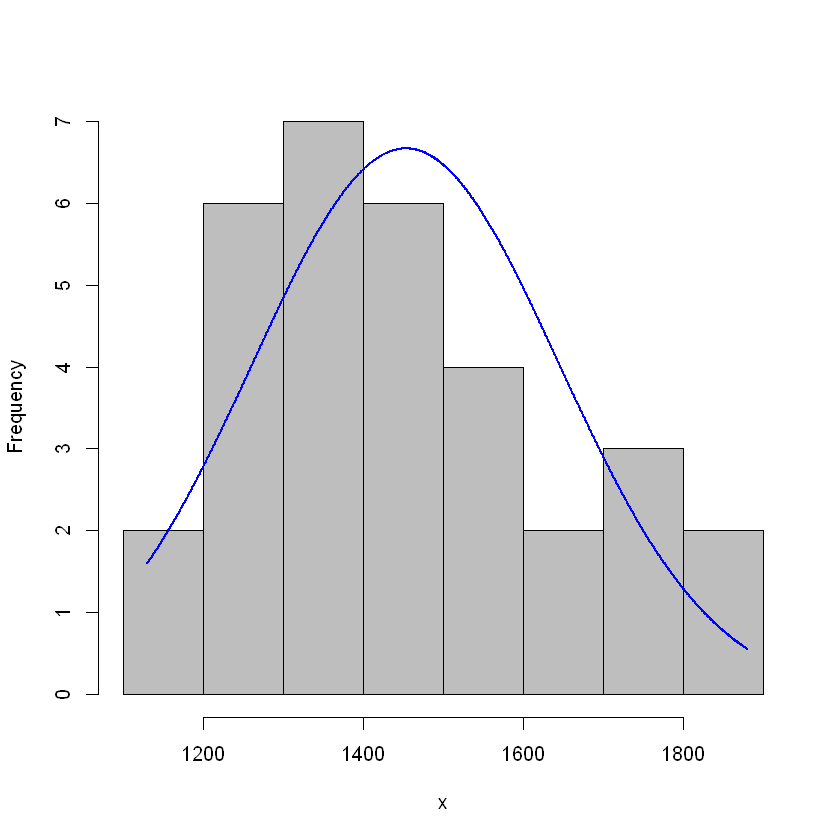

In [21]:
plotNormalHistogram(data2$Baseline.Resting.Metabolic.Rate..kcal.d.)

Hoozah! Looks pretty normal and you'll take it, no transformation necessary!

Try the follow-up data:

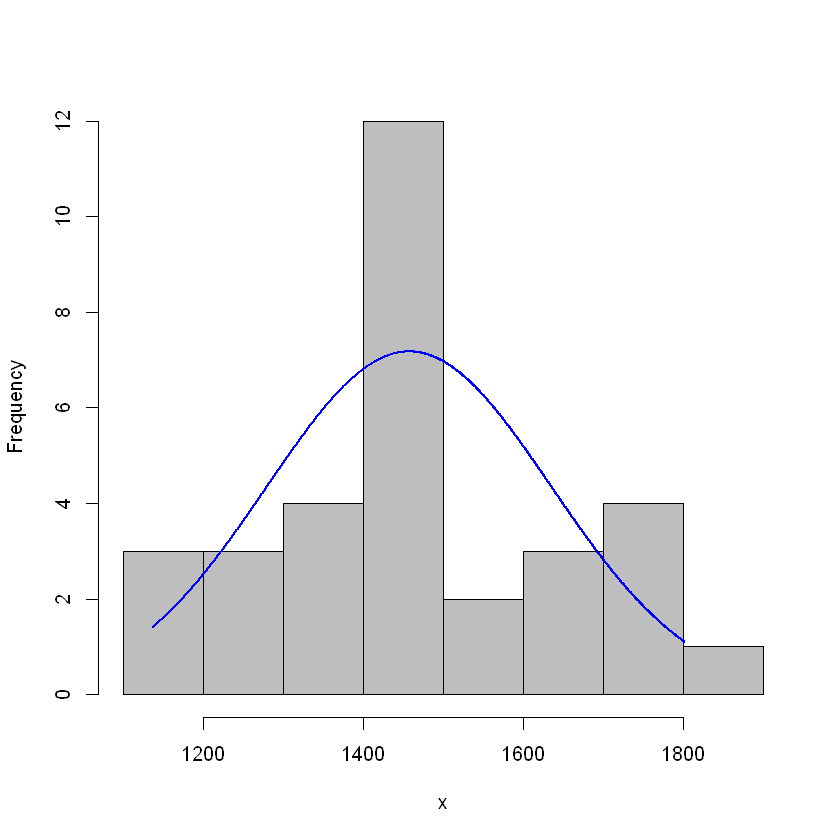

In [22]:
plotNormalHistogram(data2$Follow.Up.Resting.Metabolic.Rate..kcal.d.)

And result! Another one normal enough to use without transformation! Yes, it may be a little platykurtic, but it's centered in the middle, so count your blessings and go with it!

### Homogeneity of Variance

The tests you learned for homogeneity of variance for one-way ANOVAs will not work for repeated measures if you need to include any other information. In this case, you are not just looking for whether the resting metabolic rate increased over time, you are looking to see if it changed over time based on the condition (eating breakfast or skipping breakfast) the patient was placed in. So, a Levene's Test can be used instead to check for homogeneity of variance, using the function from the car library, leveneTest(). Here you will specify the variable information you are testing. Your y variable will go first, separated by a tilde and followed by your x variable and an asterisk, then your time variable. The time variable is contrasts, and remember that it represents time 1 (baseline) or time 2 (follow up). Altogether, you can read this code as a sentence like this: "Resting metabolic rate by treatment group over time."

In [23]:
leveneTest(repdat ~ Treatment.Group*contrasts, data=data5)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,1.025095,0.3879729
,60,NA,NA


Just like the other tests for homogeneity of variance, you want Levene's test to be non-significant in order to pass this assumption. And lo and behold, it is! No need for correction!

### Correcting for Violations of Homogeneity of Variance

If you had violated the assumption of homogeneity of variance, you could correct for it by running a BoxCox transformation on your data, or by running a more robust ANOVA, that can handle a violation of this assumption.

### Sample Size

A repeated measures ANOVA requires a sample size of at least 20 per independent variable. You have that, so this assumption has been met.

### Sphericity

The only way to test for sphericity in R is to take a multivariate approach and make it work for an ANOVA. At this time, that is a bit too complex, but it may be covered later.

In [24]:
str(data2)

'data.frame':	33 obs. of  7 variables:
 $ Participant.Code                         : int  2 4 11 14 16 19 20 23 27 34 ...
 $ Treatment.Group                          : chr  "Fasting" "Fasting" "Fasting" "Fasting" ...
 $ Age..y.                                  : int  27 25 44 36 28 38 48 54 27 22 ...
 $ Sex                                      : chr  "Female" "Female" "Male" "Female" ...
 $ Height..m.                               : num  1.75 1.72 1.64 1.68 1.64 1.74 1.78 1.75 1.63 1.66 ...
 $ Baseline.Resting.Metabolic.Rate..kcal.d. : int  1418 1332 1521 1399 1457 1357 1445 NA 1257 1713 ...
 $ Follow.Up.Resting.Metabolic.Rate..kcal.d.: int  1509 1517 1444 1383 1412 1465 1367 NA 1286 1657 ...


In [25]:
#### Page 3

In [26]:
## starts with a video

In [27]:
### video starts in the middle of Meredith working on a data set - she goes straight into doing the ANOVA

In [28]:
### where is this data?

In [29]:
## Page 3 text

##  Repeated Measures ANOVAs Analysis in R

Alright! You've done all the prep work, now it's time for the fun!

### Analysis

You will continue to use the aov() function, but add some additional arguments to it to make it repeated measures.

In [30]:
RManova <- aov(repdat~contrasts+Error(Participant.Code), data5)
summary(RManova)


Error: Participant.Code
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  1 154931  154931               

Error: Within
          Df  Sum Sq Mean Sq F value Pr(>F)
contrasts  1     276     276   0.009  0.926
Residuals 61 1963092   32182               

So what's happening here is that you are calling the aov() function on your repeated data of metabolic rate by your timepoint, and then adding in an error term, which is what makes this a repeated measure - you are telling it that it should be looking within each participant, which is what this part of the code does: Error(Participant.Code). Finish it all off by specifying the dataset at the end and you are good to go. Call summary() on the results:

Under the Error:Within table (since this is a within subjects ANOVA, after all), there you will find your F value and the associated p value. Looks like there is not a significant effect of time on resting metabolic rate.

### Post Hocs

The overall test wasn't significant, so no need to worry about post hocs.

In [31]:
#### Page 4 (Activity)

In [32]:
#### Page 5 (Activity Solution)

In [33]:
#### end of lesson - hands on next